In [39]:
import numpy as np
from numpy import linalg as nplin
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

### Data Cleaning and Pre-Processing

In [40]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
dat = pd.read_csv(path, header=None)
col_val = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
dat.columns = col_val

In [41]:
dat.replace("?", np.nan, inplace = True)
dat.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
dat.dropna(subset=["price"],axis=0,inplace=True)
dat.reset_index(drop=True,inplace=True)

In [43]:
# Replace with the most frequent value
dat['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [44]:
dat['num-of-doors'].replace(np.nan,"four",inplace=True)

In [63]:
missing_data = dat.isnull()

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Na

In [45]:
#replace Nan values with their means
norm_mean = dat["normalized-losses"].astype("float").mean()
dat["normalized-losses"].replace(np.nan,norm_mean,inplace=True)
bore_mean = dat["bore"].astype("float").mean()
dat["bore"].replace(np.nan,bore_mean,inplace=True)
stroke_mean = dat["stroke"].astype("float").mean()
dat["stroke"].replace(np.nan,stroke_mean,inplace = True)
horsepower_mean = dat['horsepower'].astype("float").mean()
dat['horsepower'].replace(np.nan, horsepower_mean, inplace=True)
peakrpm_mean=dat['peak-rpm'].astype('float').mean()
dat['peak-rpm'].replace(np.nan, peakrpm_mean, inplace=True)

In [46]:
dat[["bore", "stroke", "peak-rpm"]] = dat[["bore", "stroke", "peak-rpm"]].astype("float")
dat[["normalized-losses"]] = dat[["normalized-losses"]].astype("int")
dat[["price"]] = dat[["price"]].astype("int")
dat[["horsepower"]] = dat[["horsepower"]].astype("int")

In [47]:
dat.drop(['fuel-type', 'aspiration', 'num-of-doors',
       'engine-location'], axis=1, inplace=True)
dat.drop(['compression-ratio', 'stroke'],axis=1, inplace=True)

In [48]:
data = pd.get_dummies(dat , columns=['symboling','make', 'body-style', 'drive-wheels', 'num-of-cylinders', 'fuel-system', 'engine-type'], prefix=['symboling','make', 'body-style', 'drive-wheels', 'num-of-cylinders', 'fuel-system', 'engine-type'])
data.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price', 'symboling_-2', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'num-of-cylinders_eight', 'num-of-cylinders_five',
       'num-of-cylinders_four', 'num-of-cylinders_six',
       'num-of-cylinders_thr

In [40]:
data

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,111,5000.0,21,27,13495,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,111,5000.0,21,27,16500,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,122,94.5,171.2,65.5,52.4,2823,152,2.68,154,5000.0,19,26,16500,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,102,5500.0,24,30,13950,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,115,5500.0,18,22,17450,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95,109.1,188.8,68.9,55.5,2952,141,3.78,114,5400.0,23,28,16845,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
197,95,109.1,188.8,68.8,55.5,3049,141,3.78,160,5300.0,19,25,19045,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
198,95,109.1,188.8,68.9,55.5,3012,173,3.58,134,5500.0,18,23,21485,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
199,95,109.1,188.8,68.9,55.5,3217,145,3.01,106,4800.0,26,27,22470,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [49]:
df_1d = dat
dat = data

In [50]:
def train_test_split(df,ratio):
  np.random.seed(5)
  msk = np.random.rand(len(df)) <= ratio
  train = df[msk]
  test = df[~msk]

  X_train = train.drop(['price'],axis=1)
  X_train = X_train.to_numpy()
  y_train = train['price']
  y_train = y_train.to_numpy()
  X_test = test.drop(['price'],axis=1)
  X_test = X_test.to_numpy()
  y_test = test['price']
  y_test = y_test.to_numpy()

  return X_train, y_train, X_test, y_test

### 1a) kNN Regression on Prices

In [57]:
def RMSE(y_pred, y_target):
  return np.sqrt(np.mean((y_pred-y_target)**2))

In [126]:
def kNNReg(X_train, y_train, X_test, k):
  y_pred = []
  for i in range(X_test.shape[0]):
    temp_dist = []
    for j in range(X_train.shape[0]):
      dist = np.linalg.norm(X_train[j]-X_test[i], 2)
      temp_dist.append(dist)
    temp_dist = np.array(temp_dist)
    idx = np.argsort(temp_dist)
    yhat = 0
    for m in range(k):
      yhat = yhat + y_train[idx[m]]
    y_pred.append(yhat/k)
  
  return y_pred

In [384]:
# Dividing into 70/30 train/test
X_train, y_train, X_test, y_test = train_test_split(dat, 0.7)

In [335]:
#predicted values from kNNReg
y_pred = kNNReg(X_train, y_train, X_test, 2)

In [336]:
#RMSE for knn with k=2
RMSE(y_pred, y_test)

2591.288133248815

### 1b) Cross Validation

In [320]:
def kfoldCV(df, k):
  df = df.sample(frac=1, random_state=42)
  df = df.to_numpy()
  size = len(df)
  num_elem = int(size/k)
  count = 0
  split_lst = []
  temp_lst = []
  while count is not k:
    if k*count<=size:
      temp = df[num_elem*count:num_elem*(count+1)]
      temp_lst.append(temp)
    else:
      temp = df[num_elem*count:]
      temp_lst.append(temp)

    count += 1
  temp = np.array([i for i in range(k)])
  count=0
  lst = []
  while count is not k:
    test = temp_lst[count]
    temp_train = [temp_lst[i] for i in range(len(temp_lst)) if i!=count]

    for i in range(len(temp_train)):
      if i==0:
        train = np.vstack((temp_train[i],temp_train[i+1]))
      elif i==1:
        continue
      else:
        train = np.vstack((train,temp_train[i]))
      
    split_lst.append([train, test])
    count+=1

  return split_lst

Running kfold CV to create splits of data and then taking avg RMSE for each corresponding k while iterating over different values of k to find an optimum

In [328]:
def mean(lst):
    return sum(lst) / len(lst)

df_arr = kfoldCV(dat, 10)
score = []
for k in range(1,10):
  lst = []
  for i in range(len(df_arr)):
    X_train = np.delete(df_arr[i][0], 12, 1)
    y_train = df_arr[i][0][:,12]
    X_test = np.delete(df_arr[i][1], 12, 1)
    y_test = df_arr[i][1][:,12]  
    val_score = RMSE(kNNReg(X_train, y_train, X_test, k), y_test)
    lst.append(val_score)
    
  score.append(mean(lst))

Plot of avg RMSE obtained from Cross Validation vs number of nearest neighbours k

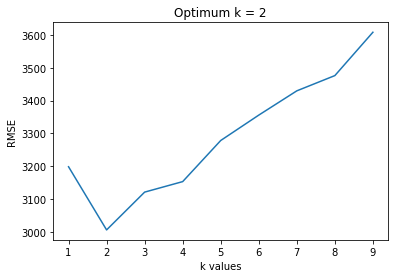

In [342]:
ax1 = [i for i in range(1,10)]
ax2 = score
plt.xlabel("k values")
plt.ylabel("RMSE")
plt.title("Optimum k = 2")
plt.plot(m1,m2)
plt.show()

As we can see from the curve optimum k value with minimum RMSE is k = 2

1c) L0 Regularization

In [346]:
def kNNRegL0(X_train, y_train, X_test, k):
  y_pred = []
  for i in range(X_test.shape[0]):
    temp_dist = []
    for j in range(X_train.shape[0]):
      dist = np.linalg.norm(X_train[j]-X_test[i], 0)
      temp_dist.append(dist)
    temp_dist = np.array(temp_dist)
    idx = np.argsort(temp_dist)
    yhat = 0
    for m in range(k):
      yhat = yhat + y_train[idx[m]]
    y_pred.append(yhat/k)
  
  return y_pred

In [348]:
y_pred = kNNRegL0(X_train, y_train, X_test,2)

In [347]:
RMSE(kNNRegL0(X_train, y_train, X_test,2), y_test)

2687.6335068114263

1d) 

In [51]:
dat = df_1d

In [52]:
lst = ['symboling','make', 'body-style', 'drive-wheels', 'num-of-cylinders', 'fuel-system', 'engine-type']
for cols in lst:
  dic = {}
  count = 0
  for item in df_1d[cols].unique():
    dic[item]=count
    count +=1
  df_1d[cols] = df_1d[cols].map(dic).astype(int)

In [53]:
df_1d

,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,122,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,111,5000.0,21,27,13495
1,0,122,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,111,5000.0,21,27,16500
2,1,122,0,1,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,154,5000.0,19,26,16500
3,2,164,1,2,1,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,102,5500.0,24,30,13950
4,2,164,1,2,2,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,115,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,4,95,21,2,0,109.1,188.8,68.9,55.5,2952,2,0,141,0,3.78,114,5400.0,23,28,16845
197,4,95,21,2,0,109.1,188.8,68.8,55.5,3049,2,0,141,0,3.78,160,5300.0,19,25,19045
198,4,95,21,2,0,109.1,188.8,68.9,55.5,3012,1,1,173,0,3.58,134,5500.0,18,23,21485
199,4,95,21,2,0,109.1,188.8,68.9,55.5,3217,2,1,145,6,3.01,106,4800.0,26,27,22470


In [54]:
def kNNReg(X_train, y_train, X_test, k):
  y_pred = []
  for i in range(X_test.shape[0]):
    temp_dist = []
    for j in range(X_train.shape[0]):
      dist = np.linalg.norm(X_train[j]-X_test[i], 2)
      temp_dist.append(dist)
    temp_dist = np.array(temp_dist)
    idx = np.argsort(temp_dist)
    yhat = 0
    for m in range(k):
      yhat = yhat + y_train[idx[m]]
    y_pred.append(yhat/k)
  
  return y_pred

In [390]:
score = []
for i in range(1,10):
  score.append(RMSE(kNNReg(X_train, y_train, X_test, i), y_test))

In [55]:
#creating a dictionary of set of models with combination of diff features
count = 0
model_dic = {}
for i in range(len(dat.columns.values[:-1])):
  count += 1
  model_dic['model'+ str(count)] = [cols for cols in dat.columns.values[:count]] + ['price']

In [58]:
#calculation RMSE for all those models
RMSE_model = {}
for model in model_dic.keys():
  temp_df = dat[model_dic[model]]
  #print(model_dic[model])
  X_train, y_train, X_test, y_test = train_test_split(temp_df, 0.7)
  RMSE_model[model] = RMSE(kNNReg(X_train, y_train, X_test, 2), y_test)  

In [62]:
model_dic['model8']

['symboling',
 'normalized-losses',
 'make',
 'body-style',
 'drive-wheels',
 'wheel-base',
 'length',
 'width',
 'price']

In [59]:
RMSE_model

{'model1': 9769.71219839746,
 'model10': 4735.373907980984,
 'model11': 4735.373907980984,
 'model12': 4735.373907980984,
 'model13': 3612.351006526752,
 'model14': 3612.351006526752,
 'model15': 3612.351006526752,
 'model16': 3427.4466902515246,
 'model17': 2591.288133248815,
 'model18': 2591.288133248815,
 'model19': 2591.288133248815,
 'model2': 6151.950890086189,
 'model3': 5971.959909213898,
 'model4': 5521.160036549706,
 'model5': 5466.558792905306,
 'model6': 5411.541925187729,
 'model7': 3934.833658409824,
 'model8': 3824.2857671769584,
 'model9': 4176.357576266514}

In [60]:
model_dic['model17']

['symboling',
 'normalized-losses',
 'make',
 'body-style',
 'drive-wheels',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'horsepower',
 'peak-rpm',
 'price']

Prediction of price best with these above feature as the model rmse with these features is minimum. We can see that these features actually effect the car prices like car make, fuel-system, body-style etc.

# Question 2

### Data Cleaning and Handling Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
col_names =  ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
dat = pd.read_csv(data_path, header=None, names = col_names)
dat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
for col in dat.columns.values:
  dat.dropna(subset=[col], inplace=True)

In [4]:
#df = pd.get_dummies(dat)
dat.drop(['education-num'],axis=1,inplace=True)

In [10]:
dat['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [11]:
X = dat.drop(["predclass"],axis=1).to_numpy()
class_label = {" <=50K": 0, " >50K":1}
dat['predclass'] = dat["predclass"].map(class_label).astype(int).to_numpy()

In [12]:
def train_test_split(df,ratio):
  np.random.seed(5)
  msk = np.random.rand(len(df)) <= ratio
  train = df[msk]
  test = df[~msk]

  X_train = train.drop(['predclass'],axis=1)
  X_train = X_train.to_numpy()
  y_train = train['predclass']
  y_train = y_train.to_numpy()
  X_test = test.drop(['predclass'],axis=1)
  X_test = X_test.to_numpy()
  y_test = test['predclass']
  y_test = y_test.to_numpy()

  return X_train, y_train, X_test, y_test

2a) Simple Decision Tree without tuning

In [16]:
class DecisionNode:

    def __init__( self, depth = 0, stump = [0,0], parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.child = []
        self.isLeaf = True
        self.label = 0

    def informationGain( self, num_plus, num_minus ):
      if num_plus==0 or num_minus==0:
          return 0
      total = num_plus + num_minus
      lst = [num_plus, num_minus]
      
      sum_ent = 0
      for item in lst:
        sum_ent += -((item/total)*np.log2(item/total))
    
      return sum_ent

    def predict(self, Xtest, catCol, catColItems):

      if self.isLeaf:
          return self.label

      else:
        if catCol[self.stump[0]] : 
          for i in range(catCol[self.stump[0]]):
            if Xtest[self.stump[0]] == catColItems[self.stump[0]][i] : 
                return self.child[i].predict(Xtest, catCol, catColItems)
          return -100        
        else :
          if Xtest[self.stump[0]] < self.stump[1]:
            return self.child[0].predict(Xtest, catCol, catColItems)
          else:
            return self.child[1].predict(Xtest, catCol, catColItems)
          
            
    def getStump( self, X, y, catCol, catColItems ):
      n = len(y)
      maxObjective = float('inf')
      bestFeat = None
      bestThresh = None

      for i in range( X.shape[1] ):
        if self.parent is not None and i == self.parent.stump[0]:
            continue

        if catCol[i]==0:
          candThresh = np.sort( X[:, i] )
          idx = np.argsort( X[:, i] )
          ySorted = y[idx]
          yCum = np.cumsum( ySorted )

          for j in range( 1, candThresh.size-1 ):
            if candThresh[j]==candThresh[j+1]:continue
            candObjective = (j+1)/n * self.informationGain(yCum[j], (j+1)-yCum[j]) \
                                + (n-j-1)/n * self.informationGain(yCum[n-1] - yCum[j], n-j-1-(yCum[n-1] - yCum[j]))
          
            if candObjective < maxObjective:
                maxObjective = candObjective
                bestFeat = i
                bestThresh = candThresh[j]
        else:
          temp = {}
          candObjective = 0
          for j in range(n):
            if y[j]:
                if X[j][i] in temp.keys():
                  temp[X[j][i]][0] = temp[X[j][i]][0] + 1
                else:
                  temp[X[j][i]] = [1,0]
            else:
                if X[j][i] in temp.keys():
                  temp[X[j][i]][1] = temp[X[j][i]][1] + 1
                else:
                  temp[X[j][i]] = [0,1]

          for j, val in temp.items():
              candObjective = candObjective + (val[0]+val[1])/n * self.informationGain(val[0], val[1])
          
          if candObjective < maxObjective:
              maxObjective = candObjective
              bestFeat = i
              bestThresh = None

      return [bestFeat, bestThresh]
            
    def train( self, X, y, maxLeafSize, maxDepth, catCol, catColItems ):
      if len(y) < maxLeafSize or self.depth >= maxDepth:
        self.isLeaf = True
        if len(y): 
          self.label = np.sum(y)/len(y)
        else: 
          self.label = -1

      else:

        self.isLeaf = False
        self.stump = self.getStump(X, y, catCol, catColItems)

        if catCol[self.stump[0]]:
          for i in range(catCol[self.stump[0]]):
            tempNode = DecisionNode( depth = self.depth + 1, parent = self )
            categ_item = catColItems[self.stump[0]][i]
            discriminant = X[:,self.stump[0]]==categ_item
            tempNode.train(X[discriminant, :], y[discriminant], maxLeafSize, maxDepth, catCol, catColItems)
            self.child.append(tempNode)

        else:
          tempNode1 = DecisionNode(depth = self.depth + 1, parent = self )
          tempNode2 = DecisionNode(depth = self.depth + 1, parent = self )
          discriminant = X[:, self.stump[0]] - self.stump[1]
          tempNode1.train( X[discriminant <= 0, :], y[discriminant <= 0], maxLeafSize, maxDepth, catCol, catColItems )
          self.child.append(tempNode1)
          tempNode2.train( X[discriminant > 0, :], y[discriminant > 0], maxLeafSize, maxDepth, catCol, catColItems )
          self.child.append(tempNode2)

In [19]:
class DecisionTree:
    def __init__( self, maxLeafSize, maxDepth, catCol=[] ):
      self.root = DecisionNode()
      self.maxLeafSize = maxLeafSize
      self.maxDepth = maxDepth 
      self.catCol = catCol  #contains binary 0/1 array denoting if a dataframe column is categorical or not
      self.catColItems = {} #dictionary to store the unique items in a categorical column
      
    def predict(self, X):
      return self.root.predict(X , self.catCol, self.catColItems)
    
    def train(self, X, y):
      self.featureCat(X)
      self.root.train(X, y, self.maxLeafSize, self.maxDepth, self.catCol, self.catColItems)

    def featureCat(self, X):
      for i in range(len(self.catCol)):
        if self.catCol[i]:
          self.catColItems[i] = np.unique(X[:,i])
          self.catCol[i] = len(self.catColItems[i])

    def model_accuracy(self, X, y):
      accuracy = 0
      for i in range(len(y)):
          pred = self.predict(X[i,:])
          check = abs(pred - y[i])<=0.5
          if pred!=-100 and check :
              accuracy+=1     
      return (accuracy/len(y))*100          

In [8]:
temp_dat = dat.drop(['predclass'],axis=1)
dataTypeDict = dict(temp_dat.dtypes)
category_col = []
for cols in dataTypeDict.keys():
  if dataTypeDict[cols] == 'O':
    category_col.append(True)
  else:
    category_col.append(False)

In [13]:
X_train, y_train, X_test, y_test = train_test_split(dat,0.7)

In [29]:
decisionTree = DecisionTree(maxLeafSize = 100, maxDepth = 12, catCol=category_col)
decisionTree.train(X_train, y_train)

In [36]:
#decisionTree.model_accuracy(X_test, y_test)
accuracy_score = []
df_arr = kfoldCV(dat, 5)
lst = []
for i in range(len(df_arr)):
    X_train = np.delete(df_arr[i][0], -1, 1)
    y_train = df_arr[i][0][:,-1].astype('int')
    X_test = np.delete(df_arr[i][1], -1, 1)
    y_test = df_arr[i][1][:,-1].astype('int')

    decisionTree = DecisionTree(100, 12, catCol=category_col)
    decisionTree.train(X_train, y_train)
    accuracy_score.append(decisionTree.model_accuracy(X_test, y_test))
print(mean(accuracy_score))

83.35995085995086


b) Decision Tree Parametres Tuning

In [23]:
def kfoldCV(df, k):
  df = df.sample(frac=1, random_state=42)
  df = df.to_numpy()
  size = len(df)
  num_elem = int(size/k)
  count = 0
  split_lst = []
  temp_lst = []
  while count is not k:
    if k*count<=size:
      temp = df[num_elem*count:num_elem*(count+1)]
      temp_lst.append(temp)
    else:
      temp = df[num_elem*count:]
      temp_lst.append(temp)

    count += 1
  temp = np.array([i for i in range(k)])
  count=0
  lst = []
  while count is not k:
    test = temp_lst[count]
    temp_train = [temp_lst[i] for i in range(len(temp_lst)) if i!=count]

    for i in range(len(temp_train)):
      if i==0:
        train = np.vstack((temp_train[i],temp_train[i+1]))
      elif i==1:
        continue
      else:
        train = np.vstack((train,temp_train[i]))
      
    split_lst.append([train, test])
    count+=1

  return split_lst

In [26]:
def mean(lst):
    return sum(lst) / len(lst)

#Set of hyperparametres for our tuning purpose
maxDepth = [i for i in range(6,14,2)]
maxLeafSize = [i for i in range(30,120,10)]
score = []
count = 0
accuracy_score = []
for depth in maxDepth:
  for leaf in  maxLeafSize:
    df_arr = kfoldCV(dat, 5)
    lst = []
    for i in range(len(df_arr)):
      X_train = np.delete(df_arr[i][0], -1, 1)
      y_train = df_arr[i][0][:,-1].astype('int')
      X_test = np.delete(df_arr[i][1], -1, 1)
      y_test = df_arr[i][1][:,-1].astype('int')
 
      decisionTree = DecisionTree(leaf, depth, catCol=category_col)
      decisionTree.train(X_train, y_train)
      accuracy_score.append(decisionTree.model_accuracy(X_test, y_test))

    score.append(mean(accuracy_score))
    print(depth,leaf,score[count])         
    count += 1    

6 30 82.86855036855037
6 40 83.01750614250615
6 50 83.13472563472564
6 60 83.20638820638821
6 70 83.28378378378379
6 80 83.371723996724
6 90 83.43366093366095
6 100 83.49086302211302
6 110 83.54217854217855
8 30 83.40417690417694
8 40 83.32560866651777
8 50 83.28572891072892
8 60 83.26474201474204
8 70 83.26013513513516
8 80 83.27538902538905
8 90 83.29007985257988
8 100 83.30828154357569
8 110 83.32821457821461
10 30 83.21010603905343
10 40 83.13144963144967
10 50 83.08032058032062
10 60 83.05631561313383
10 70 83.04708364490975
10 80 83.0539772727273
10 90 83.0624078624079
10 100 83.07408807408812
10 110 83.08569933569937
12 30 83.00807300807304
12 40 82.95655765483355
12 50 82.92424242424244
12 60 82.91035903939131
12 70 82.9087645884521
12 80 82.91815575906487
12 90 82.92762682468566
12 100 82.93997893997896
12 110 82.95249795249796
